*Titaninc Survival Prediction*


In [3]:
# importing the datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import ShuffleSplit

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


dataset = pd.read_csv('tested .csv')
dataset.head()

-------------------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# generating summary for the numerical columns in the datasets
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
# checking for missing values
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
# checking for duplicates
print(f"There are {dataset.duplicated().sum()} duplicates in the dataset")

There are 0 duplicates in the dataset


In [7]:
# Handling the missing values
dataset.fillna({"Age":dataset["Age"].mean()},inplace=True)

In [8]:
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
dataset.shape

(418, 12)

In [10]:
# dropping the missing values
dataset.dropna(inplace=True)


# Exploratory Data Analaysis

Univariate analysis

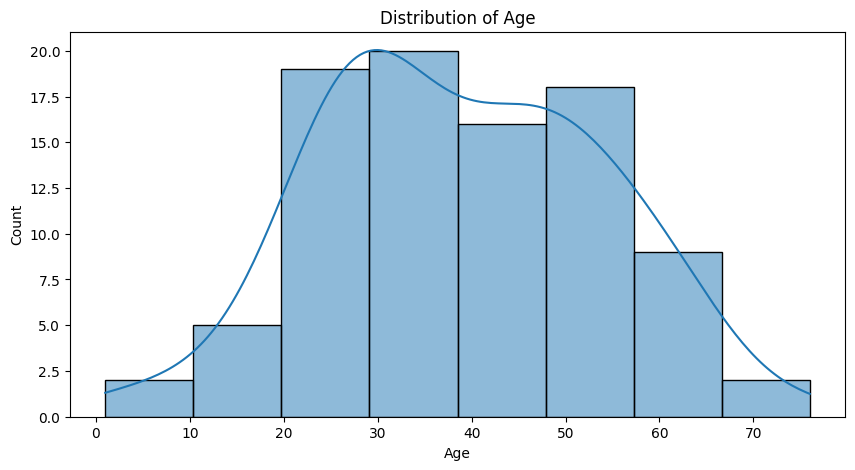

In [11]:
# distribution of Age
plt.figure(figsize=(10,5))
sns.histplot(dataset["Age"],kde=True)
plt.title("Distribution of Age")
plt.show()

From the above visualization we gain the following insights:


*   Age - majority of people are aged between 20 - 30 years
*   Distribution - the distribution is rightly skewed, indicating that there are fewer older people.
*   Outliers - there are fewer individuals above 50 years old
*   General trend - the general trend suggest a gradual decline of individual as the age increases beyond 30









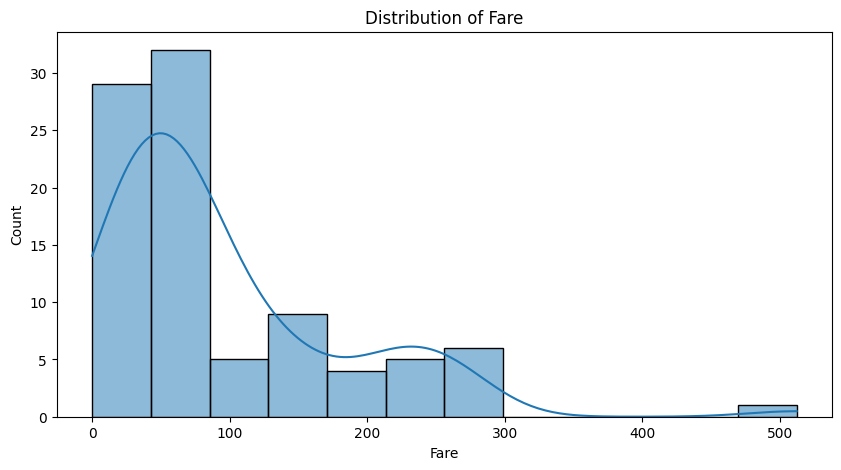

In [12]:
# distribution of fare
plt.figure(figsize=(10,5))
sns.histplot(dataset["Fare"],kde=True)
plt.title("Distribution of Fare")
plt.show()

### Key insights


1.  Distribution shape

  * The plot is highly right-skewed with the majority of fare clustured in the lower range

2. Fare concentration

  * Most fair are concentrated between 0-50 showing that majority of transacion are for economical fare price

3. outliers
  * A few outliers exist with fair exceeding 300 indicating infrequent but signifant higer priced transaction


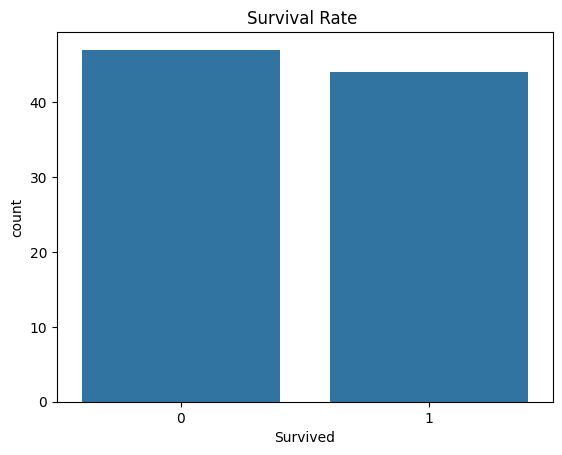

In [13]:
# survival rate plot
plt.figure(figure=(10,5))
sns.countplot(x="Survived",data=dataset)
plt.title("Survival Rate ")
plt.show()




Key insights


*   The counts of passengers who survived (1) and did not survive(0) is almost the same



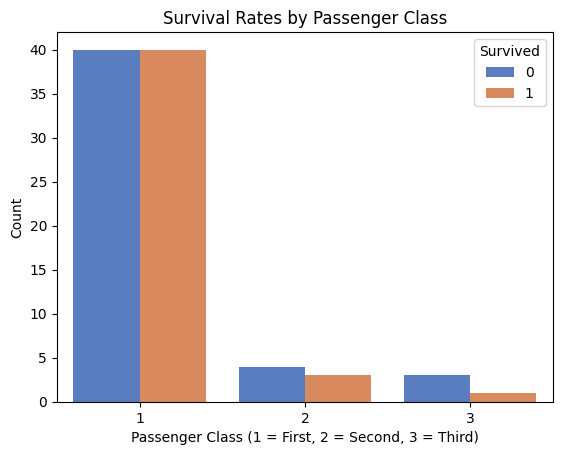

In [14]:
# plot of survival rates by passenger class
sns.countplot(x='Pclass', hue='Survived', data=dataset, palette='muted')
plt.title("Survival Rates by Passenger Class")
plt.xlabel("Passenger Class (1 = First, 2 = Second, 3 = Third)")
plt.ylabel("Count")
plt.show()


Key insights


*   Passengers in first class had a higher chances of survival compared to others
*   Passengers in the second class had the highest mortality rate



# Modelling

## Data preparation

In [15]:
dataset.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
12,1,1,female,23.0,1,0,82.2667,S
14,1,1,female,47.0,1,0,61.1750,S
24,1,1,female,48.0,1,3,262.3750,C
26,1,1,female,22.0,0,1,61.9792,C
28,0,1,male,41.0,0,0,30.5000,S


In [16]:
# OnehotEncoding the categorical features
for col in dataset.columns:
  if col == "Sex":
    dataset[col] = LabelEncoder().fit_transform(dataset[col])
  else:
    col == "Embarked"
    dataset[col] = LabelEncoder().fit_transform(dataset[col])

dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
12,1,0,0,8,1,0,40,2
14,1,0,0,30,1,0,30,2
24,1,0,0,31,1,3,56,0
26,1,0,0,7,0,1,31,0
28,0,0,1,25,0,0,15,2


### feature engineering

In [17]:
# Creating  a new feature 'FamilySize' as a combination of 'SibSp' and 'Parch'
if 'SibSp' in dataset.columns and 'Parch' in dataset.columns:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1


In [18]:
# creating a new feature if family size ==1
dataset["isALone"] = (dataset["FamilySize"] ==1). astype(int)

In [19]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,isALone
12,1,0,0,8,1,0,40,2,2,0
14,1,0,0,30,1,0,30,2,2,0
24,1,0,0,31,1,3,56,0,5,0
26,1,0,0,7,0,1,31,0,2,0
28,0,0,1,25,0,0,15,2,1,1


In [20]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,isALone
12,1,0,0,8,1,0,40,2,2,0
14,1,0,0,30,1,0,30,2,2,0
24,1,0,0,31,1,3,56,0,5,0
26,1,0,0,7,0,1,31,0,2,0
28,0,0,1,25,0,0,15,2,1,1


In [21]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,isALone
12,1,0,0,8,1,0,40,2,2,0
14,1,0,0,30,1,0,30,2,2,0
24,1,0,0,31,1,3,56,0,5,0
26,1,0,0,7,0,1,31,0,2,0
28,0,0,1,25,0,0,15,2,1,1


In [22]:
# Spliting our dataset into the target and independent variables
from sklearn.model_selection import train_test_split
x = dataset.drop("Survived",axis=1)
y = dataset["Survived"]

In [23]:
# Spliting the dataset into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [24]:
# logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)
pred = logistic_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc)
print(classification_report(y_test,pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        10

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



In [25]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
decision_model = DecisionTreeClassifier()
decision_model.fit(x_train,y_train)
pred = decision_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc)
print(classification_report(y_test,pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        10

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



In [26]:
# random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
random_model = RandomForestClassifier()
random_model.fit(x_train,y_train)
pred = random_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc)
print(classification_report(y_test,pred))


1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        10

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



In [27]:
import joblib

In [28]:
# loading the model
joblib.dump(logistic_model, "logistic_regression_model.pkl")
joblib.dump(decision_model, "decision_model.pkl")
joblib.dump(random_model, "random_model.pkl")


print("Model saved successfully!")

Model saved successfully!
